In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, f1_score, mean_squared_error, mean_absolute_error, accuracy_score

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

pd.set_option('expand_frame_repr', False)

In [2]:
DATA_DIR = 'Metro Connect Trips October 2019_Zoned.csv'

In [3]:
df = pd.read_csv(DATA_DIR)
df = df[1:].dropna()
df[1:].isna().sum(axis=0)

Appt. Date        0
Acct              0
Vehicle Code      0
Trip#             0
PickUp Time       0
PickUp Address    0
Arrival Time      0
D/Off Address     0
Rider Fare        0
PickUp Lat        0
PickUp Lng        0
PickUp Zipcode    0
D/Off Lat         0
D/Off Lng         0
D/Off Zipcode     0
D/Off Type        0
Time Slots        0
Weekday           0
Zone              0
dtype: int64

In [4]:
data_visualization = df[['Weekday', 'Acct', 'Time Slots', 'PickUp Zipcode']]

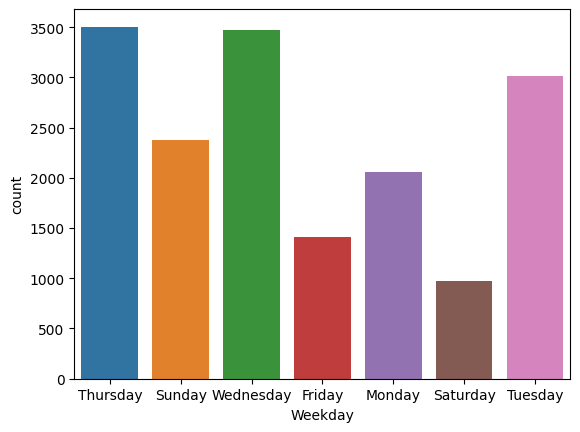

In [5]:
sns.countplot(x="Weekday", data=data_visualization)
plt.show()

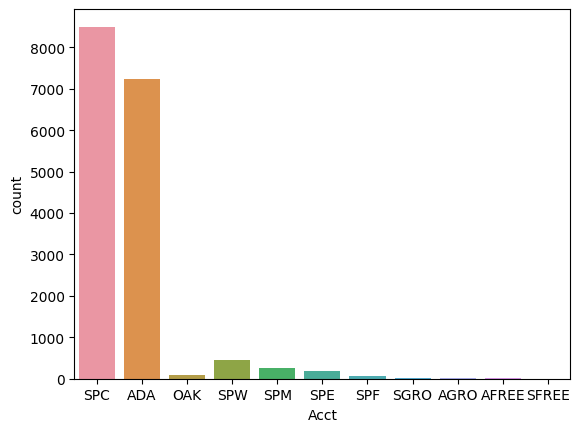

In [6]:
sns.countplot(x="Acct", data=data_visualization)
plt.show()

<Axes: xlabel='PickUp Zipcode', ylabel='Acct'>

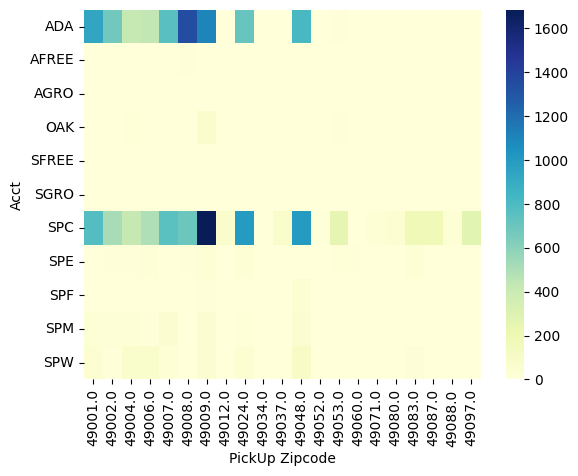

In [7]:
import seaborn as sns

sns.heatmap(pd.crosstab(data_visualization['Acct'], data_visualization['PickUp Zipcode']),
            cmap="YlGnBu")

<Axes: xlabel='Time Slots', ylabel='Acct'>

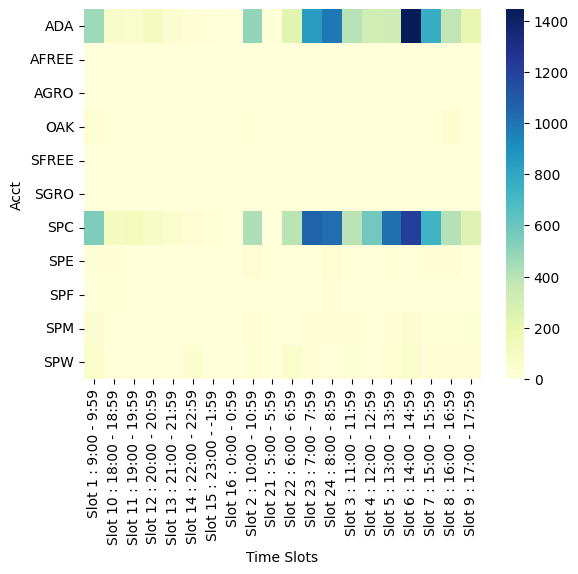

In [8]:
import seaborn as sns

sns.heatmap(pd.crosstab(data_visualization['Acct'], data_visualization['Time Slots']),
            cmap="YlGnBu")

<Axes: xlabel='Time Slots', ylabel='Weekday'>

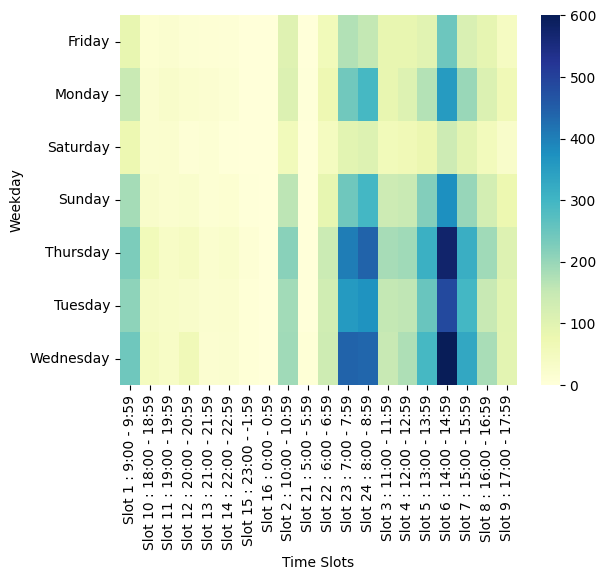

In [9]:
import seaborn as sns

sns.heatmap(pd.crosstab(data_visualization['Weekday'], data_visualization['Time Slots']),
            cmap="YlGnBu")

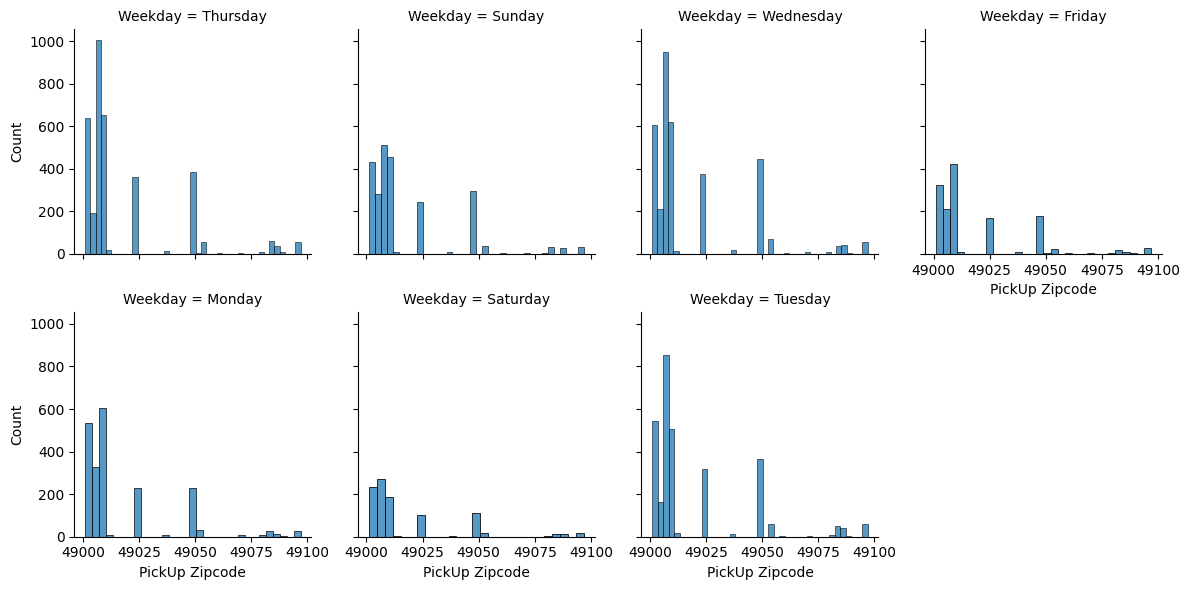

In [10]:
g = sns.FacetGrid(data_visualization, col="Weekday", col_wrap=4)
g.map(sns.histplot, "PickUp Zipcode")

In [11]:
X = df[['Weekday', 'Acct', 'Time Slots']]
X = pd.get_dummies(X)
X.shape

(16813, 38)

In [12]:
y = df['PickUp Zipcode']
le = LabelEncoder()
y = le.fit_transform(y)
y.shape

(16813,)

In [13]:
y

array([ 5, 11,  6, ...,  3, 11, 11], dtype=int64)

In [14]:
# scaler = StandardScaler()
# scaler.fit_transform(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
model1 = svm.SVC()
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model3 = DecisionTreeClassifier(random_state=42)

In [17]:
model1.fit(X_train, y_train)

SVC()

In [18]:
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
model3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
print("SVM:\n")
y_pred1 = model1.predict(X_test)

cm = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy :", accuracy)

mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred1)
print("Mean Absolute Error:", mae)

SVM:

Confusion Matrix:
 [[ 59  46  15  14   5  45 195   0  34   0   0 117   0   0   0   0   0   0
    0   0   4]
 [ 24  76  22  11   5  20 106   0  55   0   0  33   0   0   0   0   0   0
    0   0   1]
 [ 24  37  53   2   7  20  78   0  49   0   0  16   0   0   0   0   0   0
    0   0   3]
 [ 14  32   7  43  14  12 126   0  37   0   0  29   0   0   0   0   0   0
    0   0   2]
 [ 17  40   9  19  20 170 166   0  33   0   0  34   0   0   0   0   0   0
    0   0   0]
 [ 12  47   7   3  10 340 130   0  42   0   0  32   0   0   0   0   0   0
    0   0   5]
 [ 42  52  24  19   9  97 448   0  60   0   0  96   0   0   0   0   0   1
    0   0  20]
 [  2   0   0   3   0   0  19   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [ 11  47  30   9   6 147 141   0 119   0   0  23   0   0   3   0   0   0
    0   0   8]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  1   0   0   0   0   0   6   0   0   0   0  20   0   0   0   0   0   0
    0   0  

In [21]:
print("RFC:\n")
y_pred2 = model2.predict(X_test)

cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy :", accuracy)

mse = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred2)
print("Mean Absolute Error:", mae)

RFC:

Confusion Matrix:
 [[ 60  47  25  12   8  50 160   0  41   0   0 127   0   0   0   0   0   0
    0   0   4]
 [ 19  75  35  13   6  25  93   0  46   0   0  40   0   0   0   0   0   0
    0   0   1]
 [ 20  31  70   2   8  28  70   0  36   0   0  17   0   3   0   0   0   1
    0   0   3]
 [ 22  34  11  34  15  17 112   0  38   0   0  26   1   4   0   0   0   0
    0   0   2]
 [ 16  41  12  17  29 177 142   0  28   0   0  46   0   0   0   0   0   0
    0   0   0]
 [ 13  52  12   3  17 342 102   0  39   0   0  43   0   0   0   0   0   0
    0   0   5]
 [ 48  62  27  16  14 102 402   0  65   0   0 109   0   2   0   0   0   1
    0   0  20]
 [  2   0   0   3   0   0  19   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [ 20  51  42   8  16 156 111   0 100   0   0  27   0   2   3   0   0   0
    0   0   8]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  1   1   0   0   0   0   1   0   2   0   0  22   0   0   0   0   0   0
    0   0  

In [22]:
print("DTC:\n")
y_pred3 = model3.predict(X_test)

cm = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy :", accuracy)

mse = mean_squared_error(y_test, y_pred3)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred3)
print("Mean Absolute Error:", mae)

DTC:

Confusion Matrix:
 [[ 80  52  18  14   7  48 159   0  32   0   0 123   0   0   0   0   0   0
    0   0   1]
 [ 27  87  24  15   8  22  90   0  43   0   0  37   0   0   0   0   0   0
    0   0   0]
 [ 35  40  59   2   3  24  70   0  35   0   0  16   0   3   0   0   0   1
    0   0   1]
 [ 35  40   7  41   8  17 112   0  30   0   0  20   1   4   0   0   0   0
    0   0   1]
 [ 25  46   9  17  28 173 146   0  25   0   0  39   0   0   0   0   0   0
    0   0   0]
 [ 25  58   7   6  14 337 107   0  34   0   0  36   0   0   0   0   0   0
    0   0   4]
 [ 66  61  22  22  17 105 403   0  62   0   0  93   0   2   0   0   0   1
    0   0  14]
 [  2   0   0   3   1   0  18   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [ 32  68  28  13  11 151 114   0  96   0   0  22   0   1   3   0   0   0
    0   0   5]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  2   1   0   0   0   0   5   0   2   0   0  18   0   0   0   0   0   0
    0   0  

In [23]:
accuracy1 = model1.score(X_test, y_test)
accuracy2 = model2.score(X_test, y_test)
accuracy3 = model3.score(X_test, y_test)

In [24]:
print("Accuracy SVM:", accuracy1)

Accuracy SVM: 0.2854877081681205


In [25]:
print("Accuracy RFC:", accuracy2)

Accuracy RFC: 0.27854877081681206


In [26]:
print("Accuracy DTC:", accuracy3)

Accuracy DTC: 0.2775574940523394
